In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import ast
import tkinter as tk
from tkinter import ttk, messagebox

### Loading the data

In [2]:
data_df=pd.read_csv('C:\\Users\\madhu\\OneDrive\\Desktop\\ACM\\Movie recommendation system\\5000 movies dataset.zip')

In [3]:
data_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
data_df=data_df[['id','title','genres']]

In [5]:
data_df.head()

,id,title,genres
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""..."
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam..."
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."


#### Extracting unique genre names

In [6]:
def extract_unique_genre_names(genre_list):
    genres = ast.literal_eval(genre_list)
    unique_genres = set(genre['name'] for genre in genres)
    return list(unique_genres)
    
data_df['genres'] = data_df['genres'].apply(extract_unique_genre_names)


In [7]:
data_df.head()

,id,title,genres
0,19995,Avatar,"[Action, Science Fiction, Adventure, Fantasy]"
1,285,Pirates of the Caribbean: At World's End,"[Action, Adventure, Fantasy]"
2,206647,Spectre,"[Action, Adventure, Crime]"
3,49026,The Dark Knight Rises,"[Drama, Action, Thriller, Crime]"
4,49529,John Carter,"[Action, Science Fiction, Adventure]"


#### Creating seperate columns for each genre

In [8]:
genres_df = data_df['genres'].str.join('|').str.get_dummies()
data_df = pd.concat([data_df, genres_df], axis=1)
data_df.drop(columns=['genres'], inplace=True)


In [9]:
data_df.head()

,id,title,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,19995,Avatar,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,285,Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,206647,Spectre,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,49026,The Dark Knight Rises,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,49529,John Carter,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
data_df.to_csv(r'C:\\Users\\madhu\\OneDrive\\Desktop\\ACM\\Movie recommendation system\\preprocessed_5000_movies.csv', index=False)

### Extracting the feature and target variables

In [11]:
features = data_df.drop(['title', 'id'], axis=1)

In [12]:
target_variable=data_df['title']

### Elbow Method to determine the number of clusters

[9163.48906933167, 7796.996585740252, 6773.413705343329, 6183.293295018972, 5832.083881815846, 5347.825097927719, 5112.069274922865, 4798.377288935025, 4560.789410473068, 4437.060811466963]


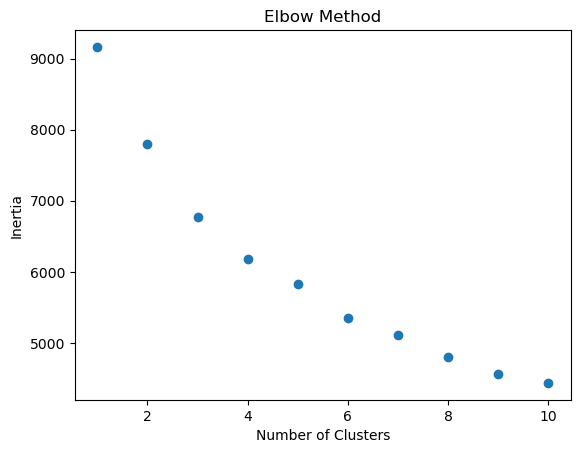

In [13]:
# Determine the number of clusters using Elbow Method (optional)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init = 10, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)
print(inertia)
plt.scatter(range(1, 11), inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

### Optimal number of clusters = 4

In [14]:
kmeans = KMeans(n_clusters=4,n_init = 10, random_state=42)
kmeans.fit(features)
data_df['Cluster'] = kmeans.labels_

In [15]:
data_df.head()

,id,title,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,Cluster
0,19995,Avatar,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3
1,285,Pirates of the Caribbean: At World's End,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,206647,Spectre,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,49026,The Dark Knight Rises,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,49529,John Carter,1,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3


In [16]:
# Function to format genre input
def format_genre(genre):
    return genre.title()

### Function to recommend movies based on title or genre
 

In [17]:
def recommend_movies(movie_title=None, genre=None, num_recommendations=10):
    if movie_title:        
        if movie_title in data_df['title'].values:
            movie_cluster = data_df.loc[data_df['title'] == movie_title, 'Cluster'].values[0]            
            similar_movies = data_df[data_df['Cluster'] == movie_cluster]            
            similar_movies = similar_movies[similar_movies['title'] != movie_title]
        else:
            return f"Movie title '{movie_title}' not found in the dataset."
    elif genre:
        formatted_genre = format_genre(genre)
        if formatted_genre in genres_df.columns:           
            similar_movies = data_df[data_df[formatted_genre] == 1]
        else:
            return f"Genre '{formatted_genre}' not found in the dataset."
    else:
        return "Please provide a movie title or genre."
    
    # Returning the top 10 recommendations
    return similar_movies.head(num_recommendations)['title']

### GUI using Tkinter

In [18]:

def on_submit():
    user_input = entry.get().strip()
    if user_input:
        recommendations = []
        if user_input in data_df['title'].values:
            recommendations = recommend_movies(movie_title = user_input)
        else:
            formatted_genre = format_genre(user_input)
            if formatted_genre in genres_df.columns:
                recommendations = recommend_movies(genre = formatted_genre)
            else:
                messagebox.showinfo("Error", "Sorry! I can't show recommendations for the entered genre or movie")
                return

        result_text.delete(1.0, tk.END)
        for movie in recommendations:
                result_text.insert(tk.END, movie + '\n')
    else:
         messagebox.showinfo("Error", "Please enter a movie title or genre.")            
   

root = tk.Tk()
root.title("Movie Recommendation System")
root.configure(bg='lightblue')

style = ttk.Style()
style.configure('TFrame', background='lightblue')
style.configure('TLabel', background='lightblue')
style.configure('TEntry', fieldbackground='lightblue')
style.configure('TButton', background='lightblue')

frame = ttk.Frame(root, padding="20", style='TFrame')
frame.grid(row=0, column=0, sticky=(tk.W, tk.E, tk.N, tk.S))

label1 = ttk.Label(frame, text="Here you can get movie recommendations by entering your preferred Genre or you can similar movie suggestions by entering a movie from the dataset.", style='TLabel',font=("Comic Sans MS", 12))
label1.grid(row=0, column=0, columnspan=3, pady=15, sticky='w')

label2 = ttk.Label(frame, text="Enter a movie title or genre:  ", style='TLabel', font=("Comic Sans MS", 12))
label2.grid(row=1, column=0, pady=10, sticky='e')

entry = ttk.Entry(frame, width=50)
entry.grid(row=1, column=1, columnspan=2, pady=5, sticky='w')

button = ttk.Button(frame, text="Get Recommendations", command=on_submit,style='TButton')
button.grid(row=2, column=0, columnspan=3, pady=10)

result_text = tk.Text(frame, width=50, height=15)
result_text.grid(row=3, column=0, columnspan=3, pady=10)

root.mainloop()